# Part I: A/B Testing for User Spending 

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.api as sm

In [3]:
app = pd.read_csv("lobster_run.csv")
app.head()

,userid,version,sum_gamerounds,retention_1,retention_7,user_spend
0,1,Gulf of Maine,3,False,False,17.09
1,2,Gulf of Maine,38,True,False,15.30
2,7,Gulf of Maine,0,False,False,13.67
3,12,Gulf of Maine,0,False,False,16.92
4,14,Gulf of Maine,39,True,False,8.42


Text(0.5, 1.0, 'The Total in-app spending(USD) since the time of the download')

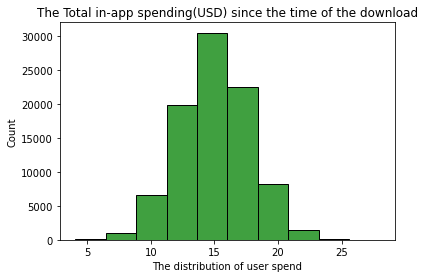

In [4]:
#A
sns.histplot(x='user_spend',bins=10,color='green',data=app)
plt.xlabel('The distribution of user spend')
plt.title('The Total in-app spending(USD) since the time of the download')

*This histogram shows the distribution of the users' total in-app spending(USD) since the time of the download. The value range from 5 to 25 and are divided into 10 equal-width bins. This histogram is Symmetric, indicating that the majority of people spend in the medium range. And there is no outlier in this dataset.*

Text(0.5, 1.0, 'The Total in-app spending(USD) since the time of the download')

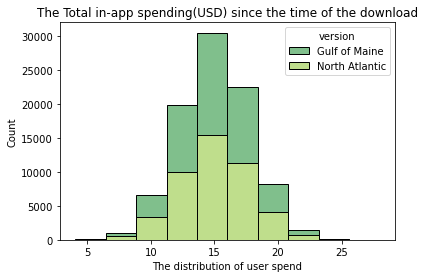

In [5]:
#B
sns.histplot(x='user_spend',bins=10,hue='version',multiple='stack', palette='summer', data=app)
plt.xlabel('The distribution of user spend')
plt.title('The Total in-app spending(USD) since the time of the download')

*This histogram indicates that the distributions of users' total in-app spending group by version are similar.*

In [6]:
#C
data=app['user_spend']
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f\n' % (stat,p))
alpha = 0.05
if p > alpha:
    print('User spend is normally distributed (fail to reject H0)')
else:
    print('User spend is not normally distributed (reject H0)')

stat=1.000, p=0.381

User spend is normally distributed (fail to reject H0)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


*(a) Null hypothesis: User spend is normally distributed*

*(b) p>0,05, fail to reject H0. User spend is normally distributed*

In [7]:
#D
Gulf=app[(app['version'] == 'Gulf of Maine')]
Atlantic=app[(app['version'] == 'North Atlantic')]
group1=Gulf['user_spend']
group2=Atlantic['user_spend']
f_stat, p_val = stats.f_oneway(group1, group2)
print("f-statistic:", f_stat)
print("p-value:", p_val)

f-statistic: 2.5199483354398935
p-value: 0.11241777327945679


*(a)The null hypothesis is that there is no significant difference in means between the groups.*

*(b)The p-value here is 0.112>0.05, fail to reject null hypothesis, so version dosen't have a significant impact on user spending*

# Part II: A/B Testing Two App Versions

In [8]:
#E
grouped=app.groupby("version")['retention_1', 'retention_7'].describe()
grouped

C:\Users\86150\AppData\Local\Temp/ipykernel_17984/760587072.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped=app.groupby("version")['retention_1', 'retention_7'].describe()


retention_1                      retention_7                \
                     count unique    top   freq       count unique    top   
version                                                                     
Gulf of Maine        44700      2  False  24666       44700      2  False   
North Atlantic       45489      2  False  25370       45489      2  False   

                       
                 freq  
version                
Gulf of Maine   35956  
North Atlantic  37210

*(a) For the variables "retention_1" and "retention_7", False means the user is no longer engaged in the app. From
 the almost identical churn rate we can see version doesn't have an impact on user behavior*

In [40]:
#F
stayed_1=sum(Gulf['retention_1']==True)  # Number of retained players for version 1
trials_v1 =len(Gulf)  # Total number of players for version 1
stayed_2=sum(Atlantic['retention_1']==True) # Number of retained players for version 2
trials_v2 = len(Atlantic)  # Total number of players for version 2

# Calculate the sample proportions and pooled proportion
prop_v1 = stayed_1/ trials_v1
prop_v2 = stayed_2 / trials_v2
pooled_prop = np.sum(stayed_1 + stayed_2) / np.sum(trials_v1 + trials_v2)

# Perform the z-test for the difference between proportions
z_stat, p_value = proportions_ztest(count=[stayed_1, stayed_2],
                                    nobs=[trials_v1, trials_v2],
                                    value=0,
                                    alternative='two-sided')
print("z_stat:", z_stat)
print("p-value:", p_value)

z_stat: 1.7840862247974725
p-value: 0.07440965529691913


*The p_value is 0.0744>0.05, reject the null hypothesis. The version does impact the retention_1.*

*(a)The null hypothesis of the test is that there is no difference in the retention_1 between the two versions of the game.*

In [19]:
#(b)
Gulf=app[(app['version'] == 'Gulf of Maine')]
Gulf

,userid,version,sum_gamerounds,retention_1,retention_7,user_spend
0,1,Gulf of Maine,3,False,False,17.09
1,2,Gulf of Maine,38,True,False,15.30
2,7,Gulf of Maine,0,False,False,13.67
3,12,Gulf of Maine,0,False,False,16.92
4,14,Gulf of Maine,39,True,False,8.42
...,...,...,...,...,...,...
44695,90180,Gulf of Maine,14,True,False,19.01
44696,90181,Gulf of Maine,7,False,False,16.12
44697,90183,Gulf of Maine,21,True,False,16.81
44698,90184,Gulf of Maine,10,False,False,16.95


In [18]:
#(c)
stayed_1=sum(Gulf['retention_1']==True)
stayed_1

20034

In [28]:
#(d)
total_stayed=sum(app['retention_1']==True)
total_stayed
expected_stayed=total_stayed/2
expected_stayed

20076.5

*If there is no difference between the two versions, then the number of people staying should be equal.*

In [49]:
#(e)
stayed_1=20034
total_stayed=40153
expected_retention=0.5
z_score, p_value = sm.stats.proportions_ztest(stayed_1, total_stayed, expected_retention)
print(f"Z-score: {z_score:.2f}")
print(f"P-value: {p_value:.4f}")

Z-score: -0.42
P-value: 0.6714


*The null hypothesis is: the retention_1 for the Gulf version isn't meaningfully different from the expected number*

*(f) The retention_1 for the Gulf version is meaningfully different from the expected number*

In [41]:
#G
stayed7_1=sum(Gulf['retention_7']==True)  # Number of retained players for version 1
trials7_v1 =len(Gulf)  # Total number of players for version 1
stayed7_2=sum(Atlantic['retention_7']==True) # Number of retained players for version 2
trials7_v2 = len(Atlantic)  # Total number of players for version 2

# Calculate the sample proportions and pooled proportion
prop7_v1 = stayed7_1/ trials7_v1
prop7_v2 = stayed7_2 / trials7_v2
pooled_prop_7 = np.sum(stayed7_1 + stayed7_2) / np.sum(trials7_v1 + trials7_v2)

# Perform the z-test for the difference between proportions
z_stat, p_value = proportions_ztest(count=[stayed7_1, stayed7_2],
                                    nobs=[trials7_v1, trials7_v2],
                                    value=0,
                                    alternative='two-sided')
print("z_stat:", z_stat)
print("p-value:", p_value)

z_stat: 5.2243715853147945
p-value: 1.7474754929457694e-07


*The p_value is 1.7474>0.05, reject the null hypothesis. The version does impact the retention_7.*

*(a)The null hypothesis of the test is that there is no difference in the retention_7 between the two versions of the game.*

In [42]:
#(b)
Gulf=app[(app['version'] == 'Gulf of Maine')]
Gulf

,userid,version,sum_gamerounds,retention_1,retention_7,user_spend
0,1,Gulf of Maine,3,False,False,17.09
1,2,Gulf of Maine,38,True,False,15.30
2,7,Gulf of Maine,0,False,False,13.67
3,12,Gulf of Maine,0,False,False,16.92
4,14,Gulf of Maine,39,True,False,8.42
...,...,...,...,...,...,...
44695,90180,Gulf of Maine,14,True,False,19.01
44696,90181,Gulf of Maine,7,False,False,16.12
44697,90183,Gulf of Maine,21,True,False,16.81
44698,90184,Gulf of Maine,10,False,False,16.95


In [43]:
#(c)
stayed_7=sum(Gulf['retention_7']==True)
stayed_7

8744

In [44]:
#(d)
total_stayed=sum(app['retention_7']==True)
total_stayed
expected_stayed=total_stayed/2
expected_stayed

8511.5

In [51]:
#(e)
stayed_7=8744
total_stayed=17023
expected_retention=0.5
z_score, p_value = sm.stats.proportions_ztest(stayed_7, total_stayed, expected_retention)
print(f"Z-score: {z_score:.2f}")
print(f"P-value: {p_value:.4f}")

Z-score: 3.57
P-value: 0.0004


*The null hypothesis is: the retention_7 for the Gulf version isn't meaningfully different from the expected number*

*(f) The retention_7 for the Gulf version isn't meaningfully different from the expected number*

*H*

*From the statistical test results we can see that version has a statistically significant effect on customer retention, and the longer the time, the greater the effect. Lobsterland should choose the version with higher retention rate and continue to optimize the upgrade to achieve the purpose of improving the retention rate and user activity.*

# Part III: Using Tableau to Build a Dashboard 

*The first dashboard compares how much visitors from different states spend at Lobsterland and their payment methods. The second dashboard shows the age distribution of Lobsterland visitors and the popularity of the four coasters. The two dashboards show that Lobsterland visitors from Maine spend the most and pay more with cash. The most popular roller coaster is the sky chair; the roller coaster with the least number of people experiencing it is Lobster Claw. And the age of 30-40s is the most among the visitors to Lobsterland.*

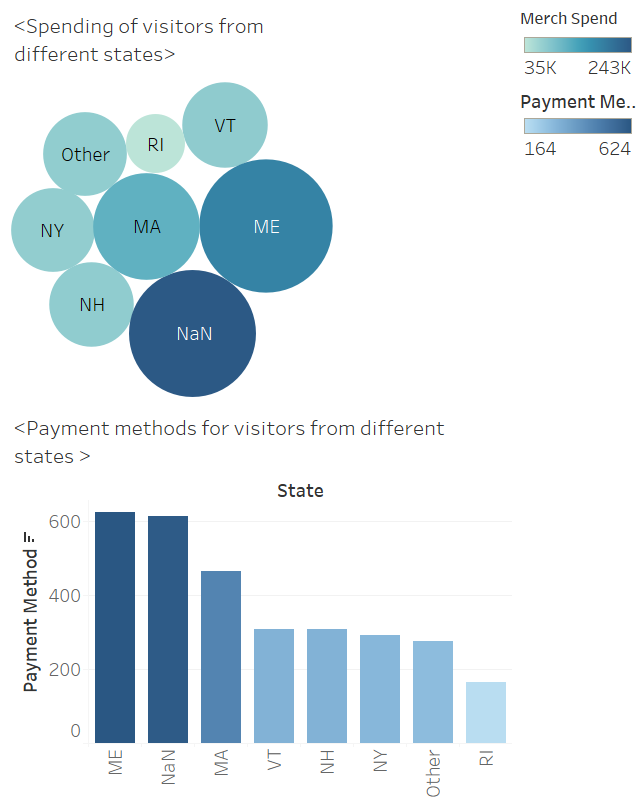

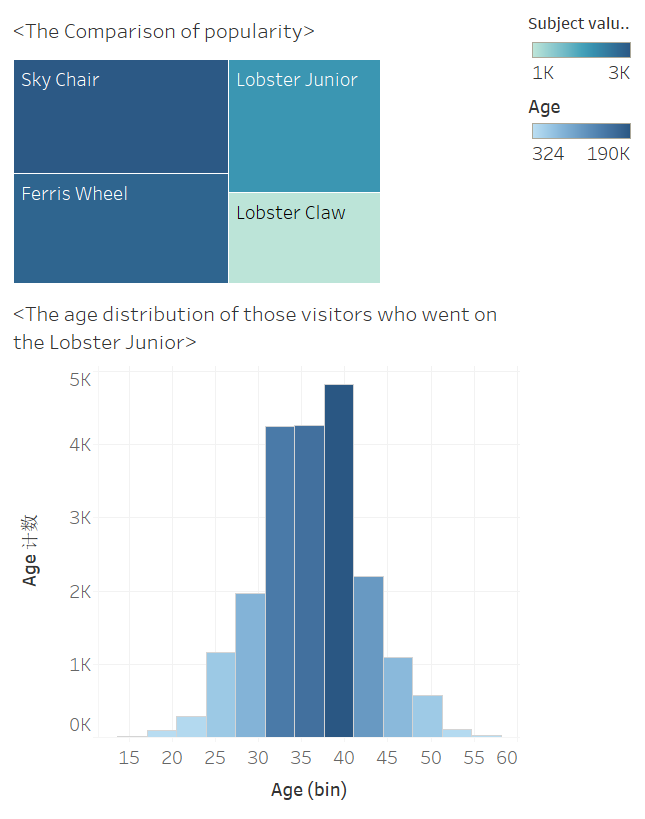

https://public.tableau.com/app/profile/yaquan.yang/viz/Yang_Assignment4_1/Dashboard1?publish=yes

https://public.tableau.com/app/profile/yaquan.yang/viz/Yang_Assignment4/Dashboard2?publish=yes